In [44]:
import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import json

# preprocess and making data - TEST

## make instances dictionary

In [45]:
DATA_PATH = '/home/gperez@gaps_domain.ssr.upm.es/PASEO/Test'  
instance_names = np.array(os.listdir(DATA_PATH))
print(type(instance_names))
print(len(instance_names))
print(instance_names)

instances_dict = {}
for i, j in enumerate(instance_names):
  instances_dict[i] = j
print(instances_dict)

<class 'numpy.ndarray'>
35
['HG043_V2' 'HF027_V2' 'HGJ005' 'HG038' 'HG028_V2' 'HG048' 'HG069'
 'HG004_V2' 'HG001' 'HGJ007' 'HG028' 'HG026' 'HG025' 'HG058' 'HG053'
 'HG019' 'HG070' 'HF026_V2' 'HGJ010' 'HG058_V2' 'HG060_V2' 'HF033'
 'HG032_V2' 'HG069_V2' 'HG061' 'HG030' 'HG015' 'HGJ001' 'HG021' 'HG048_V2'
 'HG041_V2' 'HG063_V2' 'HG003_V2' 'HG074_V2' 'HF032_V2']
{0: 'HG043_V2', 1: 'HF027_V2', 2: 'HGJ005', 3: 'HG038', 4: 'HG028_V2', 5: 'HG048', 6: 'HG069', 7: 'HG004_V2', 8: 'HG001', 9: 'HGJ007', 10: 'HG028', 11: 'HG026', 12: 'HG025', 13: 'HG058', 14: 'HG053', 15: 'HG019', 16: 'HG070', 17: 'HF026_V2', 18: 'HGJ010', 19: 'HG058_V2', 20: 'HG060_V2', 21: 'HF033', 22: 'HG032_V2', 23: 'HG069_V2', 24: 'HG061', 25: 'HG030', 26: 'HG015', 27: 'HGJ001', 28: 'HG021', 29: 'HG048_V2', 30: 'HG041_V2', 31: 'HG063_V2', 32: 'HG003_V2', 33: 'HG074_V2', 34: 'HF032_V2'}


In [46]:
NEW_DATA_PATH = 'instances_dict_test.json'
with open(NEW_DATA_PATH, 'w') as f:
    json.dump(instances_dict, f)

## utility functions

In [47]:
def mask_null_values(signal, event):
  signal_length = len(signal)

  for index, row in event.iterrows():
      if row['value'] == 2:
          start_index = row['start']
          end_index = row['end']

          signal[start_index:end_index + 1] = [np.nan] 

  return signal

In [48]:
def mask_Artificail_null_values(signal, event):
  signal_length = len(signal)

  for index, row in event.iterrows():
      if row['value'] == 5:
          start_index = row['start']
          end_index = row['end']

          signal[start_index:end_index + 1] = [np.nan] 

  return signal

In [49]:
def align_length(signal):
    if len(signal) < 15000:
        num = 15000 - len(signal)
        # signal = np.pad(signal, (0, num), mode='edge')
        signal = np.pad(signal, (0, num), mode='constant', constant_values=None)
    elif len(signal) >= 15000:
        signal = signal[:15000]
    return signal

In [50]:
def remove_outlier(signal):
    mean = np.nanmean(signal)
    std = np.nanstd(signal)
    threshold = mean + 2 * std
    
    # Clamp values above positive threshold
    signal = np.where(signal > threshold, threshold, signal)
    
    # Clamp values below negative threshold
    signal = np.where(signal < -threshold, -threshold, signal)
    
    return signal

## SmoothPur_1_4

In [51]:
SmoothPur_1_4 = []
ex_1 = ['SmoothPur_1', 'SmoothPur_2', 'SmoothPur_3', 'SmoothPur_4']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_1_4', total=len(instance_names)):
  instance = []
  for j in ex_1:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    np_Lx = np.array(Lx)
    np_Lx = mask_null_values(np_Lx, eventL)
    np_Lx = align_length(np_Lx)
    #np_Lx = remove_outlier(np_Lx)

    Rx = sigR.iloc[: , 0].tolist()
    np_Rx = np.array(Rx)
    np_Rx = mask_null_values(np_Rx, eventR)
    np_Rx = align_length(np_Rx)
    #np_Rx = remove_outlier(np_Rx)

    targetx = target.iloc[: , 0].tolist()
    np_targetx = np.array(targetx)
    np_targetx = align_length(np_targetx)

    result = [np_Lx, np_Rx, np_targetx]
    instance.append(result)
  SmoothPur_1_4.append(instance)
SmoothPur_1_4 = np.array(SmoothPur_1_4)

extracting data_SmoothPur_1_4:   0%|          | 0/35 [00:00<?, ?it/s]

In [52]:
SmoothPur_1_4_Ar = []
ex_1 = ['SmoothPur_1', 'SmoothPur_2', 'SmoothPur_3', 'SmoothPur_4']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_1_4', total=len(instance_names)):
  instance = []
  for j in ex_1:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    np_Lx = np.array(Lx)
    np_Lx = mask_Artificail_null_values(np_Lx, eventL)
    np_Lx = align_length(np_Lx)
    #np_Lx = remove_outlier(np_Lx)

    Rx = sigR.iloc[: , 0].tolist()
    np_Rx = np.array(Rx)
    np_Rx = mask_Artificail_null_values(np_Rx, eventR)
    np_Rx = align_length(np_Rx)
    #np_Rx = remove_outlier(np_Rx)

    targetx = target.iloc[: , 0].tolist()
    np_targetx = np.array(targetx)
    np_targetx = align_length(np_targetx)

    result = [np_Lx, np_Rx, np_targetx]
    instance.append(result)
  SmoothPur_1_4_Ar.append(instance)
SmoothPur_1_4_Ar = np.array(SmoothPur_1_4_Ar)

extracting data_SmoothPur_1_4:   0%|          | 0/35 [00:00<?, ?it/s]

In [53]:
np.save('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_1_4', SmoothPur_1_4)
np.save('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_1_4_Ar', SmoothPur_1_4_Ar)

In [54]:
print(len(SmoothPur_1_4))
print(type(SmoothPur_1_4))
print(SmoothPur_1_4.shape)

35
<class 'numpy.ndarray'>
(35, 4, 3, 15000)


In [55]:
print(len(SmoothPur_1_4_Ar))
print(type(SmoothPur_1_4_Ar))
print(SmoothPur_1_4_Ar.shape)

35
<class 'numpy.ndarray'>
(35, 4, 3, 15000)


## SmoothPur_5_8

In [56]:
SmoothPur_5_8 = []
ex_2 = ['SmoothPur_5', 'SmoothPur_6', 'SmoothPur_7', 'SmoothPur_8']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_5_8', total=len(instance_names)):
  instance = []
  for j in ex_2:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Ly = sigL.iloc[: , 1].tolist()
    np_Ly = np.array(Ly)
    np_Ly = mask_null_values(np_Ly, eventL)
    np_Ly = align_length(np_Ly)
    #np_Ly = remove_outlier(np_Ly)

    Ry = sigR.iloc[: , 1].tolist()
    np_Ry = np.array(Ry)
    np_Ry = mask_null_values(np_Ry, eventR)
    np_Ry = align_length(np_Ry)
    #np_Ry = remove_outlier(np_Ry)

    targety = target.iloc[: , 1].tolist()
    np_targety = np.array(targety)
    np_targety = align_length(np_targety)

    result = [np_Ly, np_Ry, np_targety]
    instance.append(result)
  SmoothPur_5_8.append(instance)
SmoothPur_5_8 = np.array(SmoothPur_5_8)

extracting data_SmoothPur_5_8:   0%|          | 0/35 [00:00<?, ?it/s]

In [57]:
SmoothPur_5_8_Ar = []
ex_2 = ['SmoothPur_5', 'SmoothPur_6', 'SmoothPur_7', 'SmoothPur_8']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_5_8', total=len(instance_names)):
  instance = []
  for j in ex_2:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Ly = sigL.iloc[: , 1].tolist()
    np_Ly = np.array(Ly)
    np_Ly = mask_Artificail_null_values(np_Ly, eventL)
    np_Ly = align_length(np_Ly)
    #np_Ly = remove_outlier(np_Ly)

    Ry = sigR.iloc[: , 1].tolist()
    np_Ry = np.array(Ry)
    np_Ry = mask_Artificail_null_values(np_Ry, eventR)
    np_Ry = align_length(np_Ry)
    #np_Ry = remove_outlier(np_Ry)

    targety = target.iloc[: , 1].tolist()
    np_targety = np.array(targety)
    np_targety = align_length(np_targety)

    result = [np_Ly, np_Ry, np_targety]
    instance.append(result)
  SmoothPur_5_8_Ar.append(instance)
SmoothPur_5_8_Ar = np.array(SmoothPur_5_8_Ar)

extracting data_SmoothPur_5_8:   0%|          | 0/35 [00:00<?, ?it/s]

In [58]:
np.save('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_5_8', SmoothPur_5_8)
np.save('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_5_8_Ar', SmoothPur_5_8_Ar)

In [59]:
print(len(SmoothPur_5_8))
print(type(SmoothPur_5_8))
print(SmoothPur_5_8.shape)

35
<class 'numpy.ndarray'>
(35, 4, 3, 15000)


In [60]:
print(len(SmoothPur_5_8_Ar))
print(type(SmoothPur_5_8_Ar))
print(SmoothPur_5_8_Ar.shape)

35
<class 'numpy.ndarray'>
(35, 4, 3, 15000)


## SmoothPur_9_10

In [61]:
SmoothPur_9_10 = []
ex_3 = ['SmoothPur_9', 'SmoothPur_10']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_9_10', total=len(instance_names)):
  instance = []
  for j in ex_3:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_null_values(np_Lx, eventL)
    np_Ly = mask_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    #np_Lx = remove_outlier(np_Lx)
    #np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_null_values(np_Rx, eventR)
    np_Ry = mask_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    #np_Rx = remove_outlier(np_Rx)
    #np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_9_10.append(instance)
SmoothPur_9_10 = np.array(SmoothPur_9_10)

extracting data_SmoothPur_9_10:   0%|          | 0/35 [00:00<?, ?it/s]

In [62]:
SmoothPur_9_10_Ar = []
ex_3 = ['SmoothPur_9', 'SmoothPur_10']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_9_10', total=len(instance_names)):
  instance = []
  for j in ex_3:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_Artificail_null_values(np_Lx, eventL)
    np_Ly = mask_Artificail_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    #np_Lx = remove_outlier(np_Lx)
    #np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_Artificail_null_values(np_Rx, eventR)
    np_Ry = mask_Artificail_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    #np_Rx = remove_outlier(np_Rx)
    #np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_9_10_Ar.append(instance)
SmoothPur_9_10_Ar = np.array(SmoothPur_9_10_Ar)

extracting data_SmoothPur_9_10:   0%|          | 0/35 [00:00<?, ?it/s]

In [63]:
np.save('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_9_10', SmoothPur_9_10)
np.save('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_9_10_Ar', SmoothPur_9_10_Ar)

In [64]:
print(len(SmoothPur_9_10))
print(type(SmoothPur_9_10))
print(SmoothPur_9_10.shape)

35
<class 'numpy.ndarray'>
(35, 2, 3, 2, 15000)


In [65]:
print(len(SmoothPur_9_10_Ar))
print(type(SmoothPur_9_10_Ar))
print(SmoothPur_9_10_Ar.shape)

35
<class 'numpy.ndarray'>
(35, 2, 3, 2, 15000)


## SmoothPur_11_12

In [66]:
SmoothPur_11_12 = []
ex_4 = ['SmoothPur_11', 'SmoothPur_12']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_11_12', total=len(instance_names)):
  instance = []
  for j in ex_4:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_null_values(np_Lx, eventL)
    np_Ly = mask_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    #np_Lx = remove_outlier(np_Lx)
    #np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_null_values(np_Rx, eventR)
    np_Ry = mask_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    #np_Rx = remove_outlier(np_Rx)
    #np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_11_12.append(instance)
SmoothPur_11_12 = np.array(SmoothPur_11_12)

extracting data_SmoothPur_11_12:   0%|          | 0/35 [00:00<?, ?it/s]

In [78]:
SmoothPur_11_12_Ar = []
ex_4 = ['SmoothPur_11', 'SmoothPur_12']

for i in tqdm(instance_names, desc='extracting data_SmoothPur_11_12', total=len(instance_names)):
  instance = []
  for j in ex_4:
    path = os.path.join(DATA_PATH, i, j)

    sigL = pd.read_csv(path + '/LTS.dat', header=None, names=['X-axis', 'Y-axis'])
    sigR = pd.read_csv(path + '/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
    eventL = pd.read_csv(path + '/LEvent.dat', header=None, names=['start', 'end', 'value'])
    eventR = pd.read_csv(path + '/REvent.dat', header=None, names=['start', 'end', 'value'])
    target = pd.read_csv(path + '/target.dat', header=None, names=['X-axis', 'Y-axis'])

    Lx = sigL.iloc[: , 0].tolist()
    Ly = sigL.iloc[: , 1].tolist()
    np_Lx = np.array(Lx)
    np_Ly = np.array(Ly)
    np_Lx = mask_Artificail_null_values(np_Lx, eventL)
    np_Ly = mask_Artificail_null_values(np_Ly, eventL)
    np_Lx = align_length(np_Lx)
    np_Ly = align_length(np_Ly)
    #np_Lx = remove_outlier(np_Lx)
    #np_Ly = remove_outlier(np_Ly)

    Rx = sigR.iloc[: , 0].tolist()
    Ry = sigR.iloc[: , 1].tolist()
    np_Rx = np.array(Rx)
    np_Ry = np.array(Ry)
    np_Rx = mask_Artificail_null_values(np_Rx, eventR)
    np_Ry = mask_Artificail_null_values(np_Ry, eventR)
    np_Rx = align_length(np_Rx)
    np_Ry = align_length(np_Ry)
    #np_Rx = remove_outlier(np_Rx)
    #np_Ry = remove_outlier(np_Ry)

    targetx = target.iloc[: , 0].tolist()
    targety = target.iloc[: , 1].tolist()
    np_targetx = np.array(targetx)
    np_targety = np.array(targety)
    np_targetx = align_length(np_targetx)
    np_targety = align_length(np_targety)

    result = [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]
    instance.append(result)
  SmoothPur_11_12_Ar.append(instance)
SmoothPur_11_12_Ar = np.array(SmoothPur_11_12_Ar)

extracting data_SmoothPur_11_12:   0%|          | 0/35 [00:00<?, ?it/s]

In [79]:
np.save('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_11_12', SmoothPur_11_12)
np.save('/home/gperez@gaps_domain.ssr.upm.es/Mehdi/SAITS-imputation-main/Test/SmoothPur_11_12_Ar', SmoothPur_11_12_Ar)

In [91]:
print(len(SmoothPur_11_12))
print(type(SmoothPur_11_12))
print(SmoothPur_11_12.shape)



35
<class 'numpy.ndarray'>
(35, 2, 3, 2, 15000)


In [92]:
print(len(SmoothPur_11_12_Ar))
print(type(SmoothPur_11_12_Ar))
print(SmoothPur_11_12_Ar.shape)



35
<class 'numpy.ndarray'>
(35, 2, 3, 2, 15000)


In [93]:
# Contar el número total de NaNs en cada arreglo
nan_count_SmoothPur_11_12 = np.isnan(SmoothPur_11_12).sum()
nan_count_SmoothPur_11_12_Ar = np.isnan(SmoothPur_11_12_Ar).sum()

# Calcular la diferencia
additional_nans = nan_count_SmoothPur_11_12_Ar - nan_count_SmoothPur_11_12

print(f"NaNs en SmoothPur_11_12: {nan_count_SmoothPur_11_12}")
print(f"NaNs en SmoothPur_11_12_Ar: {nan_count_SmoothPur_11_12_Ar}")
print(f"NaNs adicionales en SmoothPur_11_12_Ar: {additional_nans}")

NaNs en SmoothPur_11_12: 86943
NaNs en SmoothPur_11_12_Ar: 226767
NaNs adicionales en SmoothPur_11_12_Ar: 139824


## plot the reslts

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets

def plot_signal_comparison_1_4_5_8(smoothpur_1_4, smoothpur_5_8, 
                                   signal_set_label='Signal Set'):
    def plot_signal(signal_set, signal_idx, idx_1, idx_2):
        if signal_set == 'smoothpur_1_4':
            signal = smoothpur_1_4[signal_idx, idx_1, idx_2]
        elif signal_set == 'smoothpur_5_8':
            signal = smoothpur_5_8[signal_idx, idx_1, idx_2]

        # Plot the signal for the given indices
        plt.figure(figsize=(18, 8))
        plt.plot(signal.flatten(), label=f'{signal_set} Signal', alpha=0.7, color='blue', linewidth=2)
        plt.title(f'Signal Comparison for {signal_set}, Index {signal_idx}, idx_1 {idx_1}, idx_2 {idx_2}')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Create interactive widgets for signal set and index selection
    interact(plot_signal,
             signal_set=widgets.Dropdown(options=['smoothpur_1_4', 'smoothpur_5_8'], 
                                         description=signal_set_label),
             signal_idx=widgets.IntSlider(min=0, max=153, step=1, value=0),
             idx_1=widgets.IntSlider(min=0, max=3, step=1, value=0),
             idx_2=widgets.IntSlider(min=0, max=2, step=1, value=0))

In [83]:
def plot_signal_comparison_9_10_11_12(smoothpur_9_10, smoothpur_11_12, 
                                      signal_set_label='Signal Set'):
    def plot_signal(signal_set, signal_idx, idx_1, idx_2, idx_3):
        if signal_set == 'smoothpur_9_10':
            signal = smoothpur_9_10[signal_idx, idx_1, idx_2, idx_3]
        elif signal_set == 'smoothpur_11_12':
            signal = smoothpur_11_12[signal_idx, idx_1, idx_2, idx_3]

        # Plot the signal for the given indices
        plt.figure(figsize=(18, 8))
        plt.plot(signal.flatten(), label=f'{signal_set} Signal', alpha=0.7, color='blue', linewidth=2)
        plt.title(f'Signal Comparison for {signal_set}, Index {signal_idx}, idx_1 {idx_1}, idx_2 {idx_2}, idx_3 {idx_3}')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Create interactive widgets for signal set and index selection
    interact(plot_signal,
             signal_set=widgets.Dropdown(options=['smoothpur_9_10', 'smoothpur_11_12'], 
                                         description=signal_set_label),
             signal_idx=widgets.IntSlider(min=0, max=153, step=1, value=0),
             idx_1=widgets.IntSlider(min=0, max=1, step=1, value=0),
             idx_2=widgets.IntSlider(min=0, max=2, step=1, value=0),
             idx_3=widgets.IntSlider(min=0, max=1, step=1, value=0))


In [84]:
plot_signal_comparison_1_4_5_8(SmoothPur_1_4, SmoothPur_5_8)


interactive(children=(Dropdown(description='Signal Set', options=('smoothpur_1_4', 'smoothpur_5_8'), value='sm…

In [85]:
plot_signal_comparison_9_10_11_12(SmoothPur_9_10, SmoothPur_11_12) #(154, 2, 3, 2, 15000)  [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]

interactive(children=(Dropdown(description='Signal Set', options=('smoothpur_9_10', 'smoothpur_11_12'), value=…

In [86]:
# shape of smoothpur_11_12 :  (154, 2, 3, 2, 15000)  [[np_Lx, np_Rx], [np_Ly, np_Ry], [np_targetx, np_targety]]

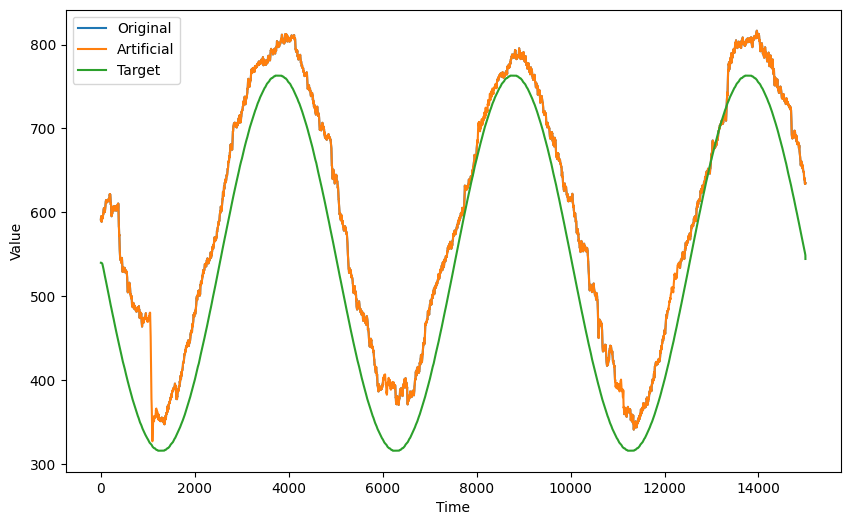

In [87]:
instance = 30
smoothpur = 0 # starts from 0
x_y_T = 1 # x= 0, Y= 1  Target =2
l_r = 1 # 0 = LEFT, 1 = RIGHT

plt.figure(figsize=(10, 6))
plt.plot(SmoothPur_11_12_Ar[instance][smoothpur][x_y_T][l_r], label='Original')
plt.plot(SmoothPur_11_12[instance][smoothpur][x_y_T][l_r], label='Artificial')
plt.plot(SmoothPur_11_12[instance][smoothpur][2][l_r], label='Target')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('HG032_v2_SPT_12.png')  # Saves as a PNG file
plt.show()

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the .dat files
eventL = pd.read_csv('J:\Imputation project/Artificial_blinks/HG032/SmoothPur_9/REvent.dat', header=None, names=['start', 'end', 'value'])
sigL = pd.read_csv('J:\Imputation project/Artificial_blinks/HG032/SmoothPur_9/RTS.dat', header=None, names=['X-axis', 'Y-axis'])
Target = pd.read_csv('J:\Imputation project/Artificial_blinks/HG032/SmoothPur_9/target.dat', header=None, names=['X-axis', 'Y-axis'])

# Identify the ranges with missing values and modify the ranges
missing_ranges = eventL[eventL['value'] == 5].copy()
# missing_ranges['start'] -= 10
# missing_ranges['end'] += 10

# Plot the sigL data
plt.figure(figsize=(14, 7))
plt.plot(sigL['X-axis'], label='X-axis', color='blue')
plt.plot(sigL['Y-axis'], label='Y-axis', color='red')
plt.plot(Target['X-axis'], label='Target_X', color='black')
plt.plot(Target['Y-axis'], label='Target_Y', color='black')

# Highlight the missing ranges
for idx, row in missing_ranges.iterrows():
    plt.axvspan(row['start'], row['end'], color='red', alpha=0.3)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal with Missing Value Ranges Highlighted')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'J:\\Imputation project/Artificial_blinks/HG032/SmoothPur_9/REvent.dat'